# Raw Data Analysis

In this section, we will analyse the raw data to understand its structure, identify any inconsistencies, and gather initial insights. The data we are working with includes columns for `species`, `chromosome`, `region`, `upstream200` and Transcripts Per Million(TPM) values.

### TPM

It is a normalization method used in RNA sequencing data to account for sequencing depth and gene length, allowing for comparison of gene expression levels between different samples as follows:

1. Dividing the read counts by the length of each gene in kilobases.
2. Normalizing these values by scaling them to one million total reads.

This results in a value that represents the proportion of transcripts for each gene per million transcripts, facilitating more accurate comparisons of gene expression across different samples and experiments.

In [1]:
import os
import sys
import gc

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from pandas import DataFrame

plt.style.use('ggplot')

In [2]:
notebooks_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebooks_dir, os.pardir))

# Add the project root directory to sys.path
if project_root not in sys.path:
    sys.path.append(project_root)

try:
    from utils.load_data import get_expression_data
    from utils.load_data import get_upstream_data
    from utils.load_data import get_merged_data
    print("Import successful")
except ImportError as e:
    print(f"Error importing module: {e}")

Import successful


In [3]:
# Paths
expression_data_path = os.path.join(notebooks_dir, '..', 'data', 'data_expression')
upstream_data_path = os.path.join(notebooks_dir, '..', 'data','data_sequences_upstream', 'upstream_sequences.xlsx')

In [4]:
# Get expression data
expression_df = get_expression_data(expression_data_path)
expression_df

,species,csv,chromosome,region,strpn_as_1_ge_tpm,strpn_as_2_ge_tpm,strpn_as_3_ge_tpm,strpn_bs_1_ge_tpm,strpn_bs_2_ge_tpm,strpn_bs_3_ge_tpm,...,ngon_oxs_3_ge_tpm,ngon_sp_1_ge_tpm,ngon_sp_2_ge_tpm,ngon_sp_3_ge_tpm,ngon_tm_1_ge_tpm,ngon_tm_2_ge_tpm,ngon_tm_3_ge_tpm,ngon_vic_1_ge_tpm,ngon_vic_2_ge_tpm,ngon_vic_3_ge_tpm
0,Streptococcus pneumoniae D39,Streptococcus pneumoniae D39.csv,NC_008533,1..1362,175.427538,208.562726,405.138482,204.885180,322.741248,256.315360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Streptococcus pneumoniae D39,Streptococcus pneumoniae D39.csv,NC_008533,1521..2657,365.544548,404.899197,160.276922,275.323213,485.163745,309.119006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Streptococcus pneumoniae D39,Streptococcus pneumoniae D39.csv,NC_008533,2722..2916,49.964010,32.349780,131.458871,10.104460,4.932655,12.137384,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Streptococcus pneumoniae D39,Streptococcus pneumoniae D39.csv,NC_008533,3000..4115,516.780668,535.373959,409.042052,225.109447,242.190725,348.868234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Streptococcus pneumoniae D39,Streptococcus pneumoniae D39.csv,NC_008533,4186..4755,96.223259,89.213815,51.891660,35.432088,55.687083,33.218105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105083,Neisseria gonorrhoeae FA 1090,Neisseria gonorrhoeae FA 1090.csv,NC_002946,complement(2151190..2152827),NaN,NaN,NaN,NaN,NaN,NaN,...,503.642767,415.782234,419.355557,521.943016,502.356290,392.374062,497.370525,515.891930,442.591970,424.146435
105084,Neisseria gonorrhoeae FA 1090,Neisseria gonorrhoeae FA 1090.csv,NC_002946,2152852..2152986,NaN,NaN,NaN,NaN,NaN,NaN,...,75.237572,22.917999,65.538628,59.603846,62.225354,53.465094,41.117354,41.724190,42.507514,16.708799
105085,Neisseria gonorrhoeae FA 1090,Neisseria gonorrhoeae FA 1090.csv,NC_002946,complement(2153000..2153221),NaN,NaN,NaN,NaN,NaN,NaN,...,195.778471,256.085406,313.401854,208.412095,143.619023,143.006359,201.472896,205.859875,195.715097,232.850661
105086,Neisseria gonorrhoeae FA 1090,Neisseria gonorrhoeae FA 1090.csv,NC_002946,complement(2153286..2153651),NaN,NaN,NaN,NaN,NaN,NaN,...,283.646793,351.871116,278.001967,360.004784,291.594410,389.521510,305.074691,364.919185,312.086781,272.202770


In [5]:
# Get upstream data
upstream_df = get_upstream_data(upstream_data_path)
upstream_df

,csv,chromosome,region,upstream200
0,Vibrio cholerae O1 biovar El Tor str. N16961.csv,NC_002505,complement(235..402),CAGGCTCTGCAGAATACACCACCGAATACCTCTGCACTACGTTATG...
1,Vibrio cholerae O1 biovar El Tor str. N16961.csv,NC_002505,complement(372..806),ATCTCGATGCCCTAGAGCGAGCCGCAGAGCACTTAGCGATTGGCCA...
2,Vibrio cholerae O1 biovar El Tor str. N16961.csv,NC_002505,complement(816..2210),TGCCAGTCATGTTCACTTTCTTCTTCCTGTGGTTCCCATCAGGTCT...
3,Vibrio cholerae O1 biovar El Tor str. N16961.csv,NC_002505,complement(2271..3896),TGGTTTATTAGTCCACTTATCGGCCCACGCTGCCGATTCACTCCTA...
4,Vibrio cholerae O1 biovar El Tor str. N16961.csv,NC_002505,complement(3899..4156),CTTTCTCATCCTCGTTTGGGACTCGCGGTTCCTAAAAAGCAGATCA...
...,...,...,...,...
96406,Legionella pneumophila subsp. pneumophila Phil...,NC_002942,complement(3393934..3395274),CAGCACCAGCTGATCCAATGCAAGCTAAGGTAATGATGTTTTTACC...
96407,Legionella pneumophila subsp. pneumophila Phil...,NC_002942,complement(3395275..3396945),ATCAGTATTTTATTAGCCCTTTGATAACACCATGTTGTCGCTATTA...
96408,Legionella pneumophila subsp. pneumophila Phil...,NC_002942,complement(3396955..3397200),AATAAGTTAGGCTATGCACGCCTTGGTTTAGCATTGTCAAAAAAAA...
96409,Legionella pneumophila subsp. pneumophila Phil...,NC_002942,complement(3397167..3397355),TAAAAAGACGTCGTGCTAAAGGTCGTAAGCGTTTATCTGCCTAAGT...


In [6]:
# Get merged data
merged_df = get_merged_data(expression_df, upstream_df)
merged_df

,species,csv,chromosome,region,strpn_as_1_ge_tpm,strpn_as_2_ge_tpm,strpn_as_3_ge_tpm,strpn_bs_1_ge_tpm,strpn_bs_2_ge_tpm,strpn_bs_3_ge_tpm,...,ngon_sp_1_ge_tpm,ngon_sp_2_ge_tpm,ngon_sp_3_ge_tpm,ngon_tm_1_ge_tpm,ngon_tm_2_ge_tpm,ngon_tm_3_ge_tpm,ngon_vic_1_ge_tpm,ngon_vic_2_ge_tpm,ngon_vic_3_ge_tpm,upstream200
0,Streptococcus pneumoniae D39,Streptococcus pneumoniae D39.csv,NC_008533,1..1362,175.427538,208.562726,405.138482,204.885180,322.741248,256.315360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Streptococcus pneumoniae D39,Streptococcus pneumoniae D39.csv,NC_008533,1521..2657,365.544548,404.899197,160.276922,275.323213,485.163745,309.119006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TTACGTTTAGAAATTGAATCAATCAAAAAGAAAATCAAATAATTTG...
2,Streptococcus pneumoniae D39,Streptococcus pneumoniae D39.csv,NC_008533,2722..2916,49.964010,32.349780,131.458871,10.104460,4.932655,12.137384,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GATTGATTCTCTTAAAGCTTTAAATAGCGAAAAGGTGACCATTAGC...
3,Streptococcus pneumoniae D39,Streptococcus pneumoniae D39.csv,NC_008533,3000..4115,516.780668,535.373959,409.042052,225.109447,242.190725,348.868234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CGTTGGGAAATTACACGTGTAGGAGCAGATATCAAAATAAAATGCA...
4,Streptococcus pneumoniae D39,Streptococcus pneumoniae D39.csv,NC_008533,4186..4755,96.223259,89.213815,51.891660,35.432088,55.687083,33.218105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CATGTCATATGAAGATCTAGTGAAATACGGATCTGAAAAGGCCGTA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105083,Neisseria gonorrhoeae FA 1090,Neisseria gonorrhoeae FA 1090.csv,NC_002946,complement(2151190..2152827),NaN,NaN,NaN,NaN,NaN,NaN,...,415.782234,419.355557,521.943016,502.356290,392.374062,497.370525,515.891930,442.591970,424.146435,CGGACACGGACACGACCCCGTTCCCTGACCCGACGCAATATTCAAA...
105084,Neisseria gonorrhoeae FA 1090,Neisseria gonorrhoeae FA 1090.csv,NC_002946,2152852..2152986,NaN,NaN,NaN,NaN,NaN,NaN,...,22.917999,65.538628,59.603846,62.225354,53.465094,41.117354,41.724190,42.507514,16.708799,GTTACGGTAATCGGCGTTGCGGGCGCGAGCGCGGCTTCGGCGGAAG...
105085,Neisseria gonorrhoeae FA 1090,Neisseria gonorrhoeae FA 1090.csv,NC_002946,complement(2153000..2153221),NaN,NaN,NaN,NaN,NaN,NaN,...,256.085406,313.401854,208.412095,143.619023,143.006359,201.472896,205.859875,195.715097,232.850661,AAACCGGCTGCCGCCTCAGGATTTCGTCGTGCGCGTCCGCCGGAAA...
105086,Neisseria gonorrhoeae FA 1090,Neisseria gonorrhoeae FA 1090.csv,NC_002946,complement(2153286..2153651),NaN,NaN,NaN,NaN,NaN,NaN,...,351.871116,278.001967,360.004784,291.594410,389.521510,305.074691,364.919185,312.086781,272.202770,AAGCGGCAAATTGGAGTGTAATTCACGGTTTAATTATCTACCCATT...


## Conflicting Regions

We now identify regions that correspond to the same region and species but have different chromosome values.

In [7]:
def find_conflicting_chromosomes(df: DataFrame) -> DataFrame:
    """
    Find regions corresponding to the same region and species but with different chromosome values.

    Args:
    df (DataFrame): The input DataFrame with columns 'species', 'chromosome', and 'region'.

    Returns:
    DataFrame: A DataFrame containing rows where there are different 'chromosome' values
               for the same 'species' and 'region'.
    """
    # Group by 'species' and 'region', then filter groups with more than one unique 'chromosome'
    result = df.groupby(['species', 'region']).filter(lambda x: x['chromosome'].nunique() > 1)
    return result

In [8]:
# Apply the function to find conflicting chromosomes in chromosome_df
conflicting_chromosomes_df = find_conflicting_chromosomes(merged_df)

# Print the results
print("\nNumber of conflicting chromosomes (species, region with multiple unique chromosome values):", len(conflicting_chromosomes_df))
print("\nConflicting chromosomes (species, region with multiple unique chromosome values):")
conflicting_chromosomes_df


Number of conflicting chromosomes (species, region with multiple unique chromosome values): 103

Conflicting chromosomes (species, region with multiple unique chromosome values):


,species,csv,chromosome,region,strpn_as_1_ge_tpm,strpn_as_2_ge_tpm,strpn_as_3_ge_tpm,strpn_bs_1_ge_tpm,strpn_bs_2_ge_tpm,strpn_bs_3_ge_tpm,...,ngon_sp_1_ge_tpm,ngon_sp_2_ge_tpm,ngon_sp_3_ge_tpm,ngon_tm_1_ge_tpm,ngon_tm_2_ge_tpm,ngon_tm_3_ge_tpm,ngon_vic_1_ge_tpm,ngon_vic_2_ge_tpm,ngon_vic_3_ge_tpm,upstream200
4468,Borrelia burgdorferi B31,Borrelia burgdorferi B31.csv,NC_000948,66..1289,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4469,Borrelia burgdorferi B31,Borrelia burgdorferi B31.csv,NC_000948,1306..1998,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACTTACAAAGTATTTTGGGCTTGATATGAAGTTTAATTCTCTGATT...
4470,Borrelia burgdorferi B31,Borrelia burgdorferi B31.csv,NC_000948,2011..2568,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CTTCTTCTGTTGACTCTATTAAGGGGAATATTGCTATTAAATCAGA...
4471,Borrelia burgdorferi B31,Borrelia burgdorferi B31.csv,NC_000948,2575..3339,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CGCTAAAGAAAGATGGACAAAATGGTGTAAATCCAGGAGATAAATT...
4472,Borrelia burgdorferi B31,Borrelia burgdorferi B31.csv,NC_000948,3963..4922,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CGGTTAAAGTAAAAGATAAACTTATTTTTAATAAAGACGGTGCTCT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92201,Klebsiella pneumoniae subsp. pneumoniae MGH 78578,Klebsiella pneumoniae subsp. pneumoniae MGH 78...,NC_009650,4335..4886,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCAAACTGACCCCATGATGGATGGTTTCTGGGCTCTGTCCACGATA...
92202,Klebsiella pneumoniae subsp. pneumoniae MGH 78578,Klebsiella pneumoniae subsp. pneumoniae MGH 78...,NC_009650,5207..5485,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GTTCAGGATGGGGCTACTATCCCACTCTCTTAAAAGAGGACATAGG...
92203,Klebsiella pneumoniae subsp. pneumoniae MGH 78578,Klebsiella pneumoniae subsp. pneumoniae MGH 78...,NC_009650,5702..5779,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TGCTAGATTGTTGATGGTCTGAATAATTTTGGGTGTGCCACGCCCT...
92204,Klebsiella pneumoniae subsp. pneumoniae MGH 78578,Klebsiella pneumoniae subsp. pneumoniae MGH 78...,NC_009650,5772..6629,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TGAGGTATCTACCCGGGACCAGAAAAGCAAAAACCCCGATAATCTT...


In [9]:
# Creating tuples from DataFrame columns
expression_triples = list(zip(expression_df['csv'], expression_df['region'], expression_df['chromosome']))
upstream_triples = list(zip(upstream_df['csv'], upstream_df['region'], expression_df['chromosome']))

Next, we convert the lists of tuples into sets. This step is crucial as it helps remove any duplicate tuples, ensuring each combination is unique.

In [10]:
# Converting lists to sets
exp_set = set(expression_triples)
upstream_set = set(upstream_triples)

We identify the common triples between the two sets. These are the combinations that appear in both expression_df and upstream_df.

In [11]:
# Finding common triples between the two sets
common_triples = exp_set & upstream_set
print("\nNumber of common triples (species, chromosome, region) in expression data and upstream data", len(common_triples))


Number of common triples (species, chromosome, region) in expression data and upstream data 705


We find the triples that are unique to each DataFrame. This helps us understand the differences between the datasets.

In [12]:
# Finding triples unique to expression_df
unique_to_exp = exp_set - upstream_set
print("\nNumber of unique triples(species, chromosome, region) in expression_df:", len(unique_to_exp))


Number of unique triples(species, chromosome, region) in expression_df: 104383


In [13]:
# Finding triples unique to upstream_df
unique_to_upstream = upstream_set - exp_set
print("\nNumber of unique triples(species, chromosome, region) in upstream_df:", len(unique_to_upstream))
print("Fraction of data we disregard due to missing expression data:", len(unique_to_upstream) / (len(unique_to_exp) + len(unique_to_upstream) - len(common_triples)))


Number of unique triples(species, chromosome, region) in upstream_df: 95643
Fraction of data we disregard due to missing expression data: 0.47984407061975404


In [14]:
# Define a function to find similar triples and categorize the differences
def find_similar_triples(triple, exp_set):
    similar_by_csv = 0
    similar_by_region = 0
    similar_by_chromosome = 0

    for exp_triple in exp_set:
        if (triple[0] == exp_triple[0] and triple[1] == exp_triple[1]):
            similar_by_chromosome += 1 if triple[2] != exp_triple[2] else 0
        elif (triple[0] == exp_triple[0] and triple[2] == exp_triple[2]):
            similar_by_region += 1 if triple[1] != exp_triple[1] else 0
        elif (triple[1] == exp_triple[1] and triple[2] == exp_triple[2]):
            similar_by_csv += 1 if triple[0] != exp_triple[0] else 0

    return similar_by_csv, similar_by_region, similar_by_chromosome

# Analyze and categorize similar triples for each unique upstream triple
total_similar_by_csv = 0
total_similar_by_region = 0
total_similar_by_chromosome = 0

for upstream_triple in unique_to_upstream:
    similar_by_csv, similar_by_region, similar_by_chromosome = find_similar_triples(upstream_triple, exp_set)
    total_similar_by_csv += similar_by_csv
    total_similar_by_region += similar_by_region
    total_similar_by_chromosome += similar_by_chromosome

    # print(f"\nFor upstream triple {upstream_triple}:")
    # print(f"Similar triples differing by csv: {similar_by_csv}")
    # print(f"Similar triples differing by region: {similar_by_region}")
    # print(f"Similar triples differing by chromosome: {similar_by_chromosome}")

# Print the total counts
print("\nTotal number of similar triples(species, chromosome, region)\nin the upstream data differing by csv from the expression data:", total_similar_by_csv)
print("Total number of similar triples(species, chromosome, region)\nin the upstream data differing by chromosome from the expression data", total_similar_by_chromosome)
print("Total number of similar triples(species, chromosome, region)\nin the upstream data differing by region from the expression data:", total_similar_by_region)


Total number of similar triples(species, chromosome, region)
in the upstream data differing by csv from the expression data: 1
Total number of similar triples(species, chromosome, region)
in the upstream data differing by chromosome from the expression data 95706
Total number of similar triples(species, chromosome, region)
in the upstream data differing by region from the expression data: 81


## Analysis of TPM values

In [15]:
tpm_columns = [col for col in merged_df.columns if 'tpm' in col]

In [16]:
# Calculate basic statistics for TPM columns
stats = merged_df[tpm_columns].describe()
stats

,strpn_as_1_ge_tpm,strpn_as_2_ge_tpm,strpn_as_3_ge_tpm,strpn_bs_1_ge_tpm,strpn_bs_2_ge_tpm,strpn_bs_3_ge_tpm,strpn_ctrl_1_ge_tpm,strpn_ctrl_2_ge_tpm,strpn_ctrl_3_ge_tpm,strpn_li_1_ge_tpm,...,ngon_oxs_3_ge_tpm,ngon_sp_1_ge_tpm,ngon_sp_2_ge_tpm,ngon_sp_3_ge_tpm,ngon_tm_1_ge_tpm,ngon_tm_2_ge_tpm,ngon_tm_3_ge_tpm,ngon_vic_1_ge_tpm,ngon_vic_2_ge_tpm,ngon_vic_3_ge_tpm
count,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,...,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000
mean,472.589792,472.589792,472.589792,472.589792,472.589792,472.589792,472.589792,472.589792,472.589792,472.589792,...,530.222694,530.222694,530.222694,530.222694,530.222694,530.222694,530.222694,530.222694,530.222694,530.222694
std,2063.618357,2043.045433,2479.185041,1651.482916,1574.800337,1585.528222,1769.830588,1773.357573,1771.554626,1965.163854,...,1666.350724,1453.671252,1299.577151,1302.481682,1665.423062,1677.701960,1603.056034,1481.370853,1472.395115,1383.072595
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.074214,22.732959,18.635654,16.783404,22.768987,27.576259,23.263011,24.155282,23.462055,25.170172,...,79.319617,78.540330,83.504028,82.637067,75.866778,77.819375,78.053042,88.524849,83.740967,85.987615
50%,89.315351,99.876393,81.489688,121.138173,135.803317,138.424505,100.407277,99.540431,101.441284,119.245883,...,182.943080,191.164793,204.350580,206.321004,181.515459,187.895489,182.412693,192.077278,192.166222,194.588743
75%,273.111199,278.905186,246.070514,332.200483,368.477417,388.374913,294.190163,293.230011,293.393606,330.955155,...,392.941185,422.112289,437.151292,453.509651,407.319812,413.393767,412.456420,404.362160,417.668766,409.312006
max,50038.057800,51001.908420,67603.712940,47628.379970,45666.622000,43517.694510,42358.373150,42450.609120,42410.491720,51582.754880,...,50267.116650,35614.006250,26857.407430,29437.948480,46103.214890,50120.609070,43492.101220,35785.879240,34998.516620,28269.028010


In [24]:
# Function to remove outliers using IQR method
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    df_clean = df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_clean

# Remove outliers
merged_df_clean = remove_outliers(merged_df, tpm_columns)

# Perform PCA on cleaned TPM columns
pca = PCA(n_components=2)
pca_result = pca.fit_transform(merged_df_clean[tpm_columns].fillna(0))
merged_df_clean['PCA1'] = pca_result[:, 0]
merged_df_clean['PCA2'] = pca_result[:, 1]

merged_df_clean['species_prefix'] = merged_df_clean['species'].str.extract(r'^(\S+\s\S+)')
unique_species = merged_df_clean['species_prefix'].unique()

# Optionally you can sample 20 categories
sampled_species = unique_species
num_categories = len(sampled_species)
cmap = plt.get_cmap('gist_ncar', num_categories)

# Map species to their corresponding colors in the sampled categories
category_to_color = {category: i for i, category in enumerate(sampled_species)}
colors = merged_df_clean['species_prefix'].map(category_to_color).fillna(-1).astype(int)

/var/folders/24/jbn800492ks0n353ktq87jp00000gn/T/ipykernel_25581/1415279686.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_clean['PCA1'] = pca_result[:, 0]
/var/folders/24/jbn800492ks0n353ktq87jp00000gn/T/ipykernel_25581/1415279686.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_clean['PCA2'] = pca_result[:, 1]
/var/folders/24/jbn800492ks0n353ktq87jp00000gn/T/ipykernel_25581/1415279686.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

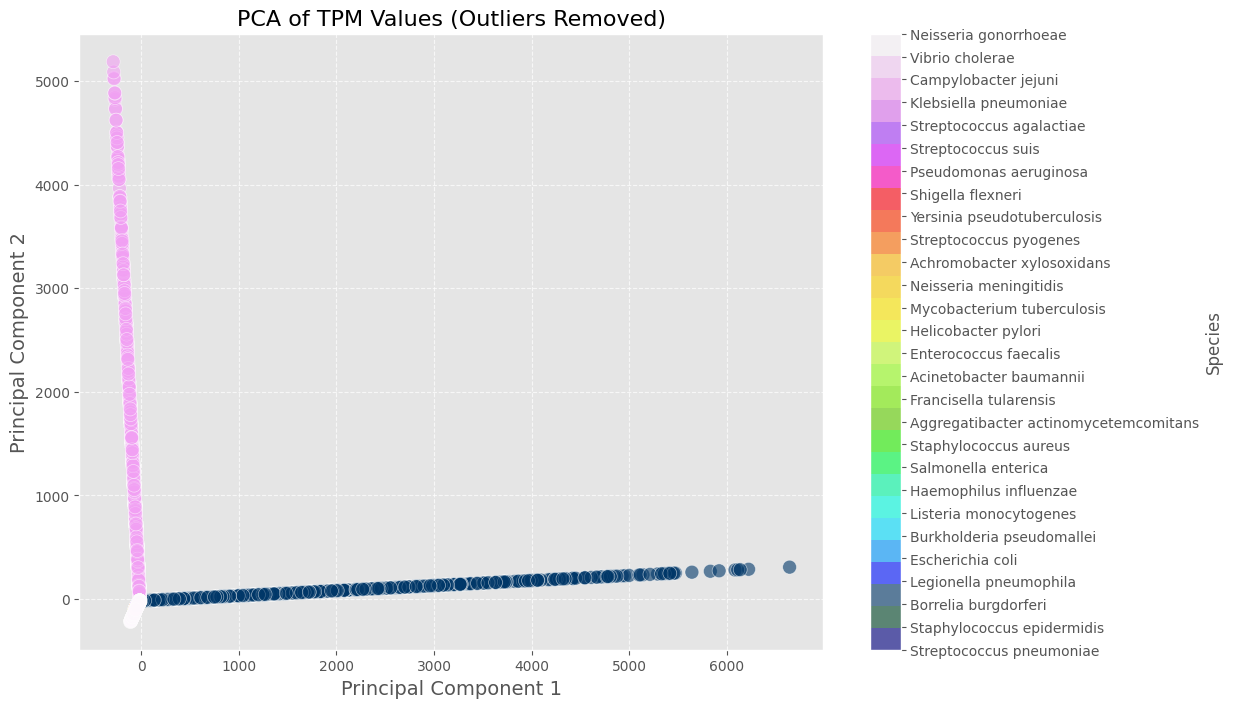

In [25]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(merged_df_clean['PCA1'], merged_df_clean['PCA2'], c=colors, cmap=cmap, alpha=0.6, edgecolors='w', s=100)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('PCA of TPM Values (Outliers Removed)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a color bar with the sampled categories
cbar = plt.colorbar(scatter, ticks=range(num_categories))
cbar.ax.set_yticklabels(sampled_species)
cbar.set_label('Species', fontsize=12)

plt.show()

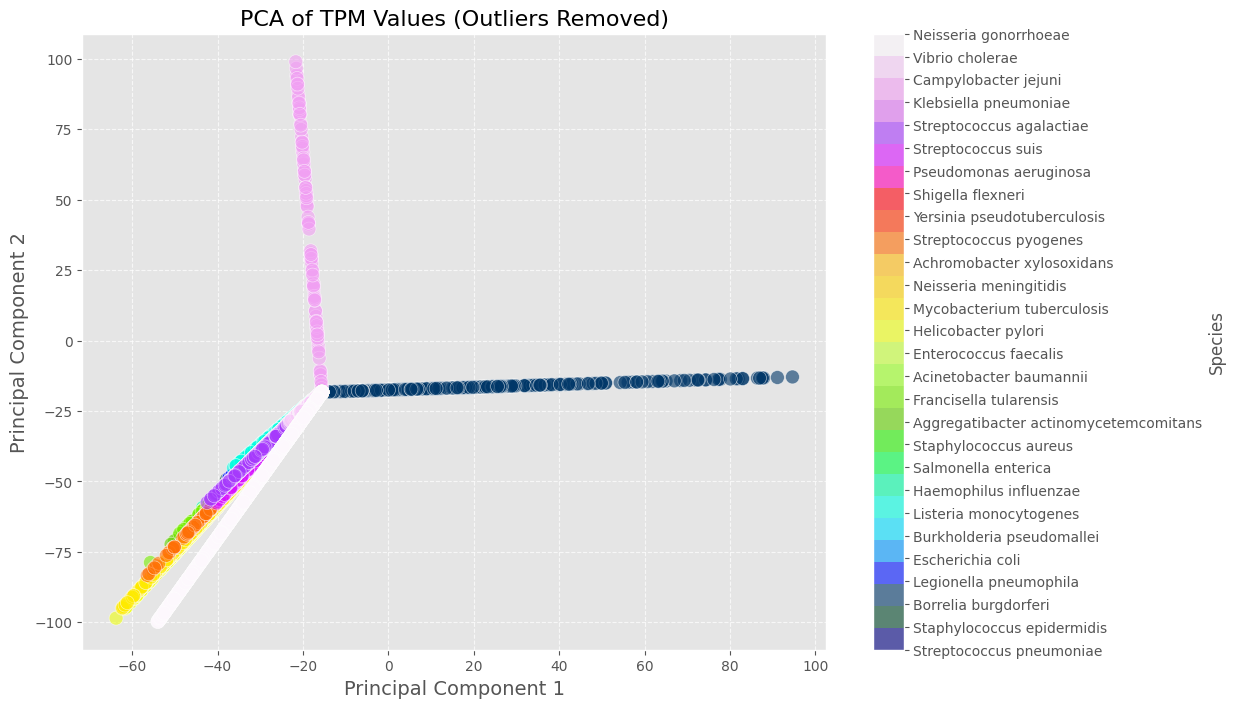

In [33]:
plt.figure(figsize=(12, 8))
mask = merged_df_clean['PCA1'].between(-100, 100) & merged_df_clean['PCA2'].between(-100, 100)
zoomed_x = merged_df_clean[mask]['PCA1']
zoomed_y = merged_df_clean[mask]['PCA2']

unique_species = merged_df_clean[mask]['species_prefix'].unique()

# Optionally you can sample 20 categories
sampled_species = unique_species
num_categories = len(sampled_species)
cmap = plt.get_cmap('gist_ncar', num_categories)

# Map species to their corresponding colors in the sampled categories
category_to_color = {category: i for i, category in enumerate(sampled_species)}
colors = merged_df_clean[mask]['species_prefix'].map(category_to_color).fillna(-1).astype(int)

scatter = plt.scatter(zoomed_x, zoomed_y, c=colors, cmap=cmap, alpha=0.6, edgecolors='w', s=100)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('PCA of TPM Values (Outliers Removed)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a color bar with the sampled categories
cbar = plt.colorbar(scatter, ticks=range(num_categories))
cbar.ax.set_yticklabels(sampled_species)
cbar.set_label('Species', fontsize=12)

plt.show()

In [ ]:
del merged_df_clean
gc.collect()

In [ ]:
control_points = [col for col in merged_df.columns if 'ctrl' in col]
control_points

['strpn_ctrl_1_ge_tpm',
 'strpn_ctrl_2_ge_tpm',
 'strpn_ctrl_3_ge_tpm',
 'sepi_ctrl_1_ge_tpm',
 'sepi_ctrl_2_ge_tpm',
 'sepi_ctrl_3_ge_tpm',
 'bburg_ctrl_1_ge_tpm',
 'bburg_ctrl_2_ge_tpm',
 'bburg_ctrl_3_ge_tpm',
 'legip_ctrl_1_ge_tpm',
 'legip_ctrl_2_ge_tpm',
 'legip_ctrl_3_ge_tpm',
 'epec_ctrl_1_ge_tpm',
 'epec_ctrl_2_ge_tpm',
 'epec_ctrl_3_ge_tpm',
 'burk_ctrl_1_ge_tpm',
 'burk_ctrl_2_ge_tpm',
 'burk_ctrl_3_ge_tpm',
 'upec_ctrl_1_ge_tpm',
 'upec_ctrl_2_ge_tpm',
 'upec_ctrl_3_ge_tpm',
 'listeria_ctrl_1_ge_tpm',
 'listeria_ctrl_2_ge_tpm',
 'listeria_ctrl_3_ge_tpm',
 'hinf_ctrl_1_ge_tpm',
 'hinf_ctrl_2_ge_tpm',
 'hinf_ctrl_3_ge_tpm',
 'salmt_ctrl_1_ge_tpm',
 'salmt_ctrl_2_ge_tpm',
 'salmt_ctrl_3_ge_tpm',
 'mrsa_ctrl_1_ge_tpm',
 'mrsa_ctrl_2_ge_tpm',
 'mrsa_ctrl_3_ge_tpm',
 'agga_ctrl_1_ge_tpm',
 'agga_ctrl_2_ge_tpm',
 'agga_ctrl_3_ge_tpm',
 'frat_ctrl_1_ge_tpm',
 'frat_ctrl_2_ge_tpm',
 'frat_ctrl_3_ge_tpm',
 'acib_ctrl_1_ge_tpm',
 'acib_ctrl_2_ge_tpm',
 'acib_ctrl_3_ge_tpm',
 'entfa_ct

In [ ]:
merged_df[control_points]

,strpn_ctrl_1_ge_tpm,strpn_ctrl_2_ge_tpm,strpn_ctrl_3_ge_tpm,sepi_ctrl_1_ge_tpm,sepi_ctrl_2_ge_tpm,sepi_ctrl_3_ge_tpm,bburg_ctrl_1_ge_tpm,bburg_ctrl_2_ge_tpm,bburg_ctrl_3_ge_tpm,legip_ctrl_1_ge_tpm,...,campy_ctrl_3_ge_tpm,etec_ctrl_1_ge_tpm,etec_ctrl_2_ge_tpm,etec_ctrl_3_ge_tpm,vibrio_ctrl_1_ge_tpm,vibrio_ctrl_2_ge_tpm,vibrio_ctrl_3_ge_tpm,ngon_ctrl_1_ge_tpm,ngon_ctrl_2_ge_tpm,ngon_ctrl_3_ge_tpm
0,353.757889,351.082556,363.002136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,485.768265,487.862041,503.274882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,91.916913,90.396213,92.982382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,538.213609,526.877310,543.981749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,158.623866,156.343157,157.155373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.185462,273.278575,461.347778
105084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.783092,54.366238,35.728013
105085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227.071357,130.878879,145.567511
105086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304.044811,329.532724,283.005395
